In [1]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\Daniel\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Daniel\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Daniel\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Daniel\anaconda3\envs\tensor\lib

In [9]:
# Define the Encoding  Dimension
encoding_dim = 64

In [14]:
# Input layer: MNIST image (28x28) reconverted to a vector of 784x1 to fit the layer
input_img = Input(shape=(784,))

# The encoded layer is a fully connected layer with ReLU activation function and applied on input layer 
# of the previous layer (encoded)
encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded) # bottleneck layer

#The decoded layer is also fully connected and its output is the same size (784)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded) # Sigmoid applied only in the end

# The Model for the Autoencoder. Input is the input layer and output is the decoded layer
autoencoder = Model(input_img, decoded)

# The Model for the Encoder with original Input and Output is the encoder itself
encoder = Model(input_img, encoded)

# The Model for the Decoder
# Create placeholder for Encoded Input 
encoded_input = Input(shape=(encoding_dim,))
# Extract the 3rd last layer from the Autoencoder input, then the 2nd and then the first to feed the layers
decoder_layer = autoencoder.layers[-3](encoded_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)
# Build the Model for the Decoder
decoder = Model(encoded_input, decoder_layer)

In [15]:
# Compile the Model to run the Autoencoder and specify the type of loss function and optimizer needed to compile in Keras
autoencoder.compile(optimizer='adadelta', loss = 'binary_crossentropy')

# Load MNIST dataset

In [16]:
(x_train, _),(x_test, _) = mnist.load_data()

# Normalize the values between 0 and 1, float32 is a floating-point number that occupies 32 bits of storage.
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = x_train.reshape((len(x_train), (np.prod(x_train.shape[1:]))))
x_test = x_test.reshape((len(x_test), (np.prod(x_test.shape[1:]))))

print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')

x_train shape = (60000, 784)
x_test shape = (10000, 784)


In [17]:
# Train the autoencoder for 50 epochs (an epoch refers to one cycle through the full training dataset) 
# Batch size generally approximates the distribution of the input data better than a single input
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 140us/step - loss: 0.3154 - val_loss: 0.2601
Epoch 2/50
60000/60000 [==============================] - 6s 105us/step - loss: 0.2474 - val_loss: 0.2372
Epoch 3/50
60000/60000 [==============================] - 7s 118us/step - loss: 0.2268 - val_loss: 0.2131
Epoch 4/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.2020 - val_loss: 0.1916
Epoch 5/50
60000/60000 [==============================] - 6s 108us/step - loss: 0.1842 - val_loss: 0.1776
Epoch 6/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.1749 - val_loss: 0.1715
Epoch 7/50
60000/60000 [==============================] - 7s 114us/step - loss: 0.1668 - val_loss: 0.1611
Epoch 8/50
60000/60000 [==============================] - 7s 115us/step - loss: 0.1588 - val_loss: 0.1542
Epoch 9/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.1526 - val_loss: 0.1

# Fit Data 

In [20]:
# Encode and Decode some digits from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

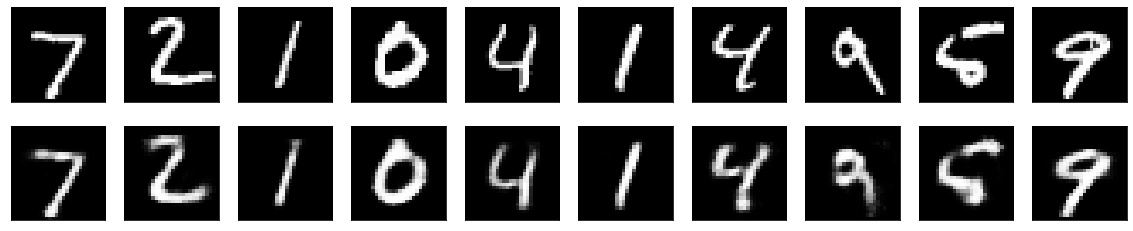

In [21]:
# Use 10 Digits 
n = 10 
plt.figure(figsize=(20,4))

for i in range(n):
    # Display Original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display Reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()